**굵은 텍스트**#**삼진그룹영어토익반**
<img src="https://drive.google.com/uc?id=1KHIt5N7wAuq8G8jeI0HE7aHfzlGC0zUa
" width=1200>

#<1> 문제상황 확인
<img src="https://drive.google.com/uc?id=1ii44CHCEJgy2NzSS034rJODB-S7WPEXt" width=1200>


#<2> AI로 문제해결하기
<img src="https://drive.google.com/uc?id=1wo9i2d-Y8HvJG2z8vN4IzAO-aLCiEGFq" width=1000>

#음용 가능한 물에 대한 다양한 데이터 샘플을 확보

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/꼬꼬무_인공지능/3.2_삼진그룹영어토익반/water_potability.csv')
data.sample(n=10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
93,9.026788,253.217074,27965.072146,6.588374,373.553235,588.319651,16.145732,59.124451,2.019042,0
1218,6.280978,205.123123,25972.803751,8.417896,383.671459,456.543945,13.954710,32.799029,4.599432,1
401,8.596391,189.523161,14518.974501,5.124129,422.990413,348.041489,17.358071,NaN,3.519884,1
2983,7.561833,170.175157,23254.009619,7.583327,328.702630,397.587974,16.140317,66.746781,4.032150,0
1100,NaN,213.041191,12036.643044,9.794730,349.171395,284.017995,12.419906,74.674383,3.898916,1
383,4.912557,308.253833,44063.098417,7.927977,280.933664,327.475650,14.857981,NaN,4.897373,1
984,NaN,238.409598,26493.076207,8.669944,311.553679,369.283864,11.759930,91.239299,3.241267,0
2779,9.454119,224.817132,21379.963927,5.407692,227.665635,431.613001,15.772334,52.033845,4.058626,1
1436,NaN,213.474706,20626.515937,8.442057,318.738774,337.895405,7.689294,77.003121,3.236570,0
741,4.638250,182.419621,34261.985889,6.197716,307.458454,439.117705,7.760853,NaN,4.124538,1


#확보된 데이타의 컬럼(Column) 설명
##1. ph: 물의 산, 염기
##2. Hardness: 물의 경도
##3. Solids: 물에 용해된 용존고체량
##4. Chloramines(클로라민): 수돗물에 정화에 쓰이는 소독약(NH2Cl)
##5. Sulfate: 황산염(SO4 2-)
##6. Conductivity: 물의 전도율
##7. Organi_carbon: 유기 탄소(유기화합물을 분해하는 산소요구량)
##8. Trihalomethanes(트라이할로메테인): 산업에서 용매 또는 냉매로 사용, 대부분 발암물질
##9. Turbidity(터비더티): 탁도 


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
print(data.groupby(['Potability']).mean()) #평균값 확인을 위한 코드

                  ph    Hardness        Solids  Chloramines    Sulfate  \
Potability                                                               
0           7.085378  196.733292  21777.490788     7.092175  334.56429   
1           7.073783  195.800744  22383.991018     7.169338  332.56699   

            Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
Potability                                                            
0             426.730454       14.364335        66.303555   3.965800  
1             425.383800       14.160893        66.539684   3.968328  


In [ ]:
print(data.groupby(['Potability'])['ph'].transform('mean'))

0       7.085378
1       7.085378
2       7.085378
3       7.085378
4       7.085378
          ...   
3271    7.073783
3272    7.073783
3273    7.073783
3274    7.073783
3275    7.073783
Name: ph, Length: 3276, dtype: float64


#데이터 전처리
## 1. 데이터의 결측값은 음용가능한 물과 그렇지 않은 물을 구별하고, 결측된 컬럼의 평균값으로 대체
## 2. 리샘플링(resampling)을 통한 데이터 편향을 방지하고, 동등한 수의 데이터를 확보

In [ ]:
data['ph']=data['ph'].fillna(data.groupby(['Potability'])['ph'].transform('mean'))
data['Sulfate']=data['Sulfate'].fillna(data.groupby(['Potability'])['Sulfate'].transform('mean'))
data['Trihalomethanes']=data['Trihalomethanes'].fillna(data.groupby(['Potability'])['Trihalomethanes'].transform('mean'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
import numpy as np
from sklearn.utils import resample

a = np.array([[0,0,0,0],[2,2,2,2],[1,1,1,1]])
b = resample(a,n_samples=10,random_state=40)
print(b)
print(a.shape)
print(b.shape)

[[1 1 1 1]
 [2 2 2 2]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [0 0 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [2 2 2 2]]
(3, 4)
(10, 4)


In [ ]:
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]  

from sklearn.utils import resample
potable = resample(potable, n_samples = 1998, random_state=40)

from sklearn.utils import shuffle
data = pd.concat([notpotable, potable])

data = shuffle(data, random_state=40)
data['Potability'].value_counts()

1    1998
0    1998
Name: Potability, dtype: int64

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
366,4.037288,291.461897,52318.917298,7.779459,332.566990,401.204271,16.542921,87.814800,3.045049,1
1542,6.347020,97.280909,19743.148416,3.402682,305.431236,502.919013,15.094091,86.554168,4.526351,1
722,8.860451,193.743105,24085.112140,6.183110,332.566990,526.704924,9.901328,81.339340,4.677713,1
540,3.841205,186.917765,19988.649262,7.174952,334.564290,483.334209,13.422802,74.381701,3.635635,0
2396,7.717077,211.681327,21400.016496,6.987854,268.944957,495.914919,11.440747,85.051546,4.967976,1


In [ ]:
portable_input = data.drop(['Potability'], axis = 1)
portable_target = data['Potability']
#portable_input = portable_input.to_numpy()
#portable_target = portable_target.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(portable_input, portable_target, random_state=40)
print(train_input.shape)
print(test_input.shape)

#데이터형의 변환 확인
print(type(train_input))

(2997, 9)
(999, 9)
<class 'pandas.core.frame.DataFrame'>


##3. K-최근접분류와 로지스틱회귀 분류 알고리즘을 위한 정규화 처리

In [ ]:
#정규화 처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_input = ss.transform(train_input)
test_input = ss.transform(test_input)

#정규화 처리된 데이터 확인
print(train_input)
print(type(train_input))

[[ 2.06507703 -0.59179148 -1.91100304 ...  0.69150629 -0.25108348
  -0.19928009]
 [-0.66577659  0.13970041  1.00537111 ... -1.49287079  0.82096087
   0.8103463 ]
 [ 0.49062833 -0.56209532 -0.42640598 ... -1.57240401  0.6144126
   0.24929209]
 ...
 [ 0.24908513  1.37759141 -0.99618732 ...  0.92526784 -0.25629331
   1.40669073]
 [ 1.44463625 -0.33154918 -0.04230819 ...  0.78565103 -0.98177523
   1.84059696]
 [ 0.51851861  1.35536898  0.40582932 ...  0.81901851  1.91810971
   1.06244427]]
<class 'numpy.ndarray'>


# 여러 머신러닝 알고리즘을 활용하여 최적의 모델 생성
##1. K-최근접분류 알고리즘
##2. 로지스틱회귀 알고리즘
##3. 결정트리 알고리즘
##4. 랜덤포레스트 알고리즘

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

kn = KNeighborsClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
#k-NN 이웃분류
para_kn = {'n_neighbors':np.arange(1, 50)} 
grid_kn = GridSearchCV(kn, param_grid=para_kn, cv=5)

#로지스틱 회귀
para_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(lr, param_grid=para_lr, cv=5)

#결정트리
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5)

#랜덤포레스트
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

In [ ]:
score_df_kn = grid_kn.fit(train_input, train_target)
score_df_lr = grid_lr.fit(train_input, train_target)
score_df_dt = grid_dt.fit(train_input, train_target)
score_df_rf = grid_rf.fit(train_input, train_target)

print("최적 파라미터 k-NN:", grid_kn.best_params_)
print("최적 파라미터 로지스틱 회귀분류:", grid_lr.best_params_)
print("최적 파라미터 결정트리:", grid_dt.best_params_)
print("최적 파라미터 랜덤포레스트:", grid_rf.best_params_)

최적 파라미터 k-NN: {'n_neighbors': 1}
최적 파라미터 로지스틱 회귀분류: {'C': 0.01}
최적 파라미터 결정트리: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}
최적 파라미터 랜덤포레스트: {'min_samples_leaf': 2, 'n_estimators': 200}


In [ ]:
cv_results_kn = pd.DataFrame(score_df_kn.cv_results_)
cv_results_lr = pd.DataFrame(score_df_lr.cv_results_)
cv_results_dt = pd.DataFrame(score_df_dt.cv_results_)
cv_results_rf = pd.DataFrame(score_df_rf.cv_results_)

In [ ]:
print(type(score_df_kn.cv_results_))
print(cv_results_kn[['params', 'split0_test_score']])

<class 'dict'>
                 params  split0_test_score
0    {'n_neighbors': 1}           0.730000
1    {'n_neighbors': 2}           0.676667
2    {'n_neighbors': 3}           0.678333
3    {'n_neighbors': 4}           0.665000
4    {'n_neighbors': 5}           0.676667
5    {'n_neighbors': 6}           0.673333
6    {'n_neighbors': 7}           0.673333
7    {'n_neighbors': 8}           0.645000
8    {'n_neighbors': 9}           0.658333
9   {'n_neighbors': 10}           0.658333
10  {'n_neighbors': 11}           0.660000
11  {'n_neighbors': 12}           0.641667
12  {'n_neighbors': 13}           0.655000
13  {'n_neighbors': 14}           0.645000
14  {'n_neighbors': 15}           0.635000
15  {'n_neighbors': 16}           0.640000
16  {'n_neighbors': 17}           0.630000
17  {'n_neighbors': 18}           0.626667
18  {'n_neighbors': 19}           0.625000
19  {'n_neighbors': 20}           0.623333
20  {'n_neighbors': 21}           0.631667
21  {'n_neighbors': 22}           0.631

In [ ]:
#최적의 학습모델 대입
kn = grid_kn.best_estimator_
lr = grid_lr.best_estimator_
dt = grid_dt.best_estimator_
rf = grid_rf.best_estimator_

# 음용 가능한 물에 대하여 테스트 샘플을 넣어 정확도 결과 확인

In [ ]:
models = [('k-NN', kn), ('로지스틱회귀', lr), ('결정트리', dt), ('랜덤포레스트', rf)]

for model_name, model in models:
    #model.fit(train_input, train_target)
    pred = model.predict(test_input)
    accuracy = accuracy_score(test_target,pred)
    print('{:s} : {:.2f}'.format(model_name, accuracy))

k-NN : 0.79
로지스틱회귀 : 0.49
결정트리 : 0.84
랜덤포레스트 : 0.90


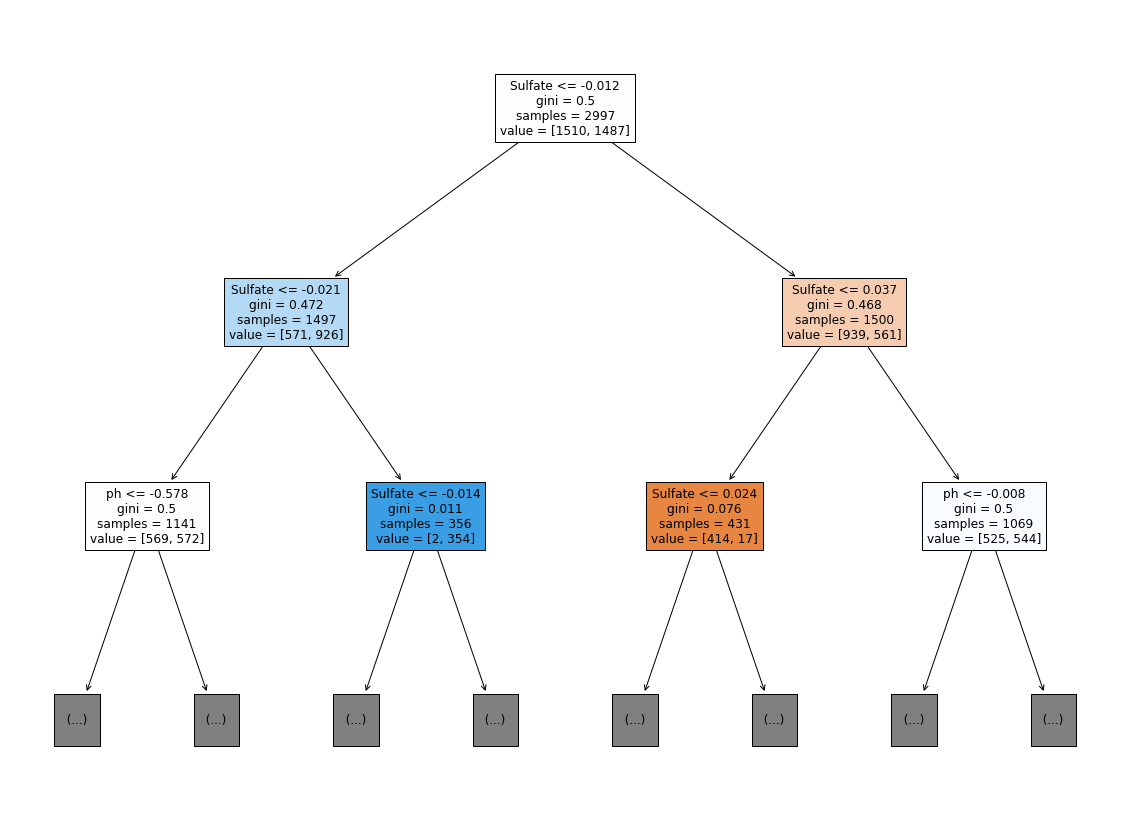

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=2, feature_names=['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity'], filled=True)
plt.show()


#삼진그룹 공장 근처 하천의 9개 지점의 물을 샘플로 가져와 실험

In [ ]:
samjin_factory_input = pd.read_csv('/content/drive/My Drive/꼬꼬무_인공지능/3.2_삼진그룹영어토익반/samjin_water.csv', header=None)
samjin_factory_input = samjin_factory_input.to_numpy()

In [ ]:
pred = rf.predict(samjin_factory_input)
for i, water in enumerate(pred) :
  print("삼진그룹 공장 {0}번 지점 하천의 음용가능 판단여부: {1}".format(i, '가능' if water else '불가능'))

삼진그룹 공장 0번 지점 하천의 음용가능 판단여부: 불가능
삼진그룹 공장 1번 지점 하천의 음용가능 판단여부: 불가능
삼진그룹 공장 2번 지점 하천의 음용가능 판단여부: 불가능
삼진그룹 공장 3번 지점 하천의 음용가능 판단여부: 불가능
삼진그룹 공장 4번 지점 하천의 음용가능 판단여부: 불가능
삼진그룹 공장 5번 지점 하천의 음용가능 판단여부: 불가능
삼진그룹 공장 6번 지점 하천의 음용가능 판단여부: 불가능
삼진그룹 공장 7번 지점 하천의 음용가능 판단여부: 불가능
삼진그룹 공장 8번 지점 하천의 음용가능 판단여부: 불가능


#<3> 영화의 새로운 결말
<img src="https://drive.google.com/uc?id=1kNb6ZNrpAUXXmckTpPSdmgPhCZznkmJd" width=1000>